<a href="https://colab.research.google.com/github/boristrs/LENIA_Alysophil/blob/main/Lenia_Alysophil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img height="50px" src="https://github.githubassets.com/pinned-octocat.svg">  Source in GitHub](https://github.com/OpenLenia/Lenia-Tutorial)

In [3]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pylab as plt
import matplotlib.animation
import IPython.display

from matplotlib.animation import FuncAnimation

#np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

def figure_world(A, cmap='viridis'):
  global img
  fig = plt.figure()
  img = plt.imshow(A, cmap=cmap, interpolation="nearest", vmin=0)
  plt.title('world A')
  plt.close()
  return fig

def figure_asset_list_v3(Ks, nKs, growth, K_sum=1):
  global R, m, s
  K_size = Ks[0].shape[0];  K_mid = K_size // 2
  fig, ax = plt.subplots(1, 3, figsize=(14,2), gridspec_kw={'width_ratios': [1,2,2]})
  K_stack = Ks[:3]
  ax[0].imshow(new_K1, cmap='inferno', alpha=0.8, interpolation='nearest')
  ax[0].imshow(new_K2, cmap='plasma', alpha=0.5, interpolation='nearest')
  ax[0].title.set_text('kernels overlay')
  X_stack = [ K[K_mid,:] for K in nKs ]
  ax[1].plot(range(K_size), np.asarray(X_stack).T)
  ax[1].title.set_text('Ks cross-sections')
  ax[1].set_xlim([K_mid - R - 3, K_mid + R + 3])
  x = np.linspace(0, K_sum, 1000)
  G_stack = [ growth(x, m, s) for k in range(len(Ks)) ]
  ax[2].plot(x, np.asarray(G_stack).T)
  ax[2].axhline(y=0, color='grey', linestyle='dotted')
  ax[2].title.set_text('growths Gs')
  return fig


## Patterns

Instead of initializing random worlds, we can load create patterns.
Moreover we can create custom kernel shape as the logo of Alysophil.

In [4]:
def raw_to_np_pattern(raw_pattern):
  # Split the pattern into rows
  rows = raw_pattern.strip().split('\n')
  # Split each row into individual binary values and convert them to integers
  binary_values = [[float(value.replace(',','.')) for value in row.split('\t')] for row in rows]
  return np.array(binary_values)

In [5]:
# Define the Alysophil's logo pattern separated by tabs
raw_aly = """
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	1	0	0	0	0	0	0	0	0	1	0	0	0	0
0	0	0	1	1	0	0	0	0	0	0	0	0	1	1	0	0	0
0	0	1	1	1	0	0	0	0	0	0	0	0	1	1	1	0	0
0	1	1	1	0	0	1	1	1	1	1	1	0	0	1	1	1	0
0	1	1	0	0	0	1	1	1	1	1	1	0	0	0	1	1	0
1	1	0	0	0	0	1	1	1	1	1	1	0	0	0	0	1	1
1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1
1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1
1	1	0	0	0	0	1	1	1	1	1	1	0	0	0	0	1	1
1	1	1	0	0	0	1	1	1	1	1	1	0	0	0	1	1	0
0	1	1	1	0	0	1	1	1	1	1	1	0	0	1	1	1	0
0	0	1	1	1	0	0	0	0	0	0	0	0	1	1	1	0	0
0	0	0	1	1	0	0	0	0	0	0	0	0	1	1	0	0	0
0	0	0	0	1	0	0	0	0	0	0	0	0	1	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
"""
#Alysophil's logo with a manual decrease
raw_smooth_aly = """
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0,1	0	0	0	0	0	0	0	0,1	0	0	0	0	0	0
0	0	0	0	0	0,1	0,5	0,1	0	0	0	0	0	0,1	0,5	0,1	0	0	0	0	0
0	0	0	0	0,1	0,5	0,75	0,5	0,1	0,1	0,1	0,1	0,1	0,5	0,75	0,5	0,1	0	0	0	0
0	0	0	0,1	0,5	0,75	1	0,75	0,5	0,5	0,5	0,5	0,5	0,75	1	0,75	0,5	0,1	0	0	0
0	0	0,1	0,5	0,75	1	1	0,75	0,75	0,75	0,75	0,75	0,75	0,75	1	1	0,75	0,5	0,1	0	0
0	0	0,5	0,75	1	1	1	0,75	1	1	1	1	1	0,75	1	1	1	0,75	0,5	0,1	0
0,1	0,1	0,5	1	1	1	0,75	0,75	1	1	1	1	1	0,75	0,75	1	1	1	0,5	0,1	0,1
0,1	0,5	0,75	1	1	0,75	0,5	0,75	1	1	1	1	1	0,75	0,5	0,75	1	1	0,75	0,5	0,1
0,5	0,75	1	1	0,75	0,5	0,1	0,75	0,75	0,75	0,75	0,75	0,75	0,75	0,1	0,5	0,75	1	1	0,75	0,5
0,5	0,75	1	0,75	0,5	0,1	0,1	0,5	0,5	0,5	0	0,5	0,5	0,5	0,1	0,1	0,5	0,75	1	0,75	0,5
0,5	0,75	1	1	0,75	0,5	0,1	0,75	0,75	0,75	0,75	0,75	0,75	0,75	0,1	0,5	0,75	1	1	0,75	0,5
0,5	0,75	1	1	1	0,75	0,5	0,75	1	1	1	1	1	0,75	0,5	0,75	1	1	1	0,75	0,5
0,1	0,5	0,75	1	1	1	0,75	0,75	1	1	1	1	1	0,75	0,75	1	1	1	0,75	0,5	0,1
0,1	0,1	0,5	0,75	1	1	1	0,75	1	1	1	1	1	0,75	1	1	1	0,75	0,5	0,1	0,1
0	0	0,1	0,5	0,75	1	1	0,75	0,75	0,75	0,75	0,75	0,75	0,75	1	1	0,75	0,5	0,1	0	0
0	0	0	0,1	0,5	0,75	1	0,75	0,5	0,5	0,5	0,5	0,5	0,75	1	0,75	0,5	0,1	0	0	0
0	0	0	0	0,1	0,5	0,75	0,5	0,1	0,1	0,1	0,1	0,1	0,5	0,75	0,5	0,1	0	0	0	0
0	0	0	0	0	0,1	0,5	0,1	0	0	0	0	0	0,1	0,5	0,1	0	0	0	0	0
0	0	0	0	0	0	0,1	0	0	0	0	0	0	0	0,1	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
"""

raw_smooth_aly2 = """
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0,1	0	0	0	0	0	0	0	0,1	0	0	0	0	0	0
0	0	0	0	0	0,1	0,5	0,1	0	0	0	0	0	0,1	0,5	0,1	0	0	0	0	0
0	0	0	0	0,1	0,5	0,75	0,5	0,1	0,1	0,1	0,1	0,1	0,5	0,75	0,5	0,1	0	0	0	0
0	0	0	0,1	0,5	0,75	1	0,75	0,5	0,5	0,5	0,5	0,5	0,75	1	0,75	0,5	0,1	0	0	0
0	0	0,1	0,5	0,75	1	1	0,75	0,75	0,75	0,75	0,75	0,75	0,75	1	1	0,75	0,5	0,1	0	0
0	0	0,5	0,75	1	1	1	0,75	1	1	1	1	1	0,75	1	1	1	0,75	0,5	0,1	0
0,1	0,1	0,5	1	1	1	0,75	0,75	1	1	1	1	1	0,75	0,75	1	1	1	0,5	0,1	0,1
0,1	0,5	0,75	1	1	0,75	0,5	0,75	1	1	1	1	1	0,75	0,5	0,75	1	1	0,75	0,5	0,1
0,5	0,75	1	1	0,75	0,5	0	0	0	0	0	0	0	0	0	0,5	0,75	1	1	0,75	0,5
0,5	0,75	1	0,75	0,5	0,1	0	0	0	0	0	0	0	0	0	0,1	0,5	0,75	1	0,75	0,5
0,5	0,75	1	1	0,75	0,5	0	0	0	0	0	0	0	0	0	0,5	0,75	1	1	0,75	0,5
0,5	0,75	1	1	1	0,75	0,5	0,75	1	1	1	1	1	0,75	0,5	0,75	1	1	1	0,75	0,5
0,1	0,5	0,75	1	1	1	0,75	0,75	1	1	1	1	1	0,75	0,75	1	1	1	0,75	0,5	0,1
0,1	0,1	0,5	0,75	1	1	1	0,75	1	1	1	1	1	0,75	1	1	1	0,75	0,5	0,1	0,1
0	0	0,1	0,5	0,75	1	1	0,75	0,75	0,75	0,75	0,75	0,75	0,75	1	1	0,75	0,5	0,1	0	0
0	0	0	0,1	0,5	0,75	1	0,75	0,5	0,5	0,5	0,5	0,5	0,75	1	0,75	0,5	0,1	0	0	0
0	0	0	0	0,1	0,5	0,75	0,5	0,1	0,1	0,1	0,1	0,1	0,5	0,75	0,5	0,1	0	0	0	0
0	0	0	0	0	0,1	0,5	0,1	0	0	0	0	0	0,1	0,5	0,1	0	0	0	0	0
0	0	0	0	0	0	0,1	0	0	0	0	0	0	0	0,1	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
"""
# raw pattern of C14H22O3 bonds and carbon are 1, oxygen are 0.75 and hydrogen are 0.25
raw_c14h22o3 = """
0,75	0,75	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0,75	0,75	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	1	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	1	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	1	1	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	1	0	0	0	1	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0
0	0	0	1	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0
0	0	1	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0
0	1	0	0	0	0	0	0	0	1	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0
0,5	0	0	0	0	0	0	0	0	1	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0
0,5	0	0	0	0	0	0	0	0	0	1	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	1	0	1	0	0	0	0	1	1	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	1	0	0	0	1	0	1	1	0	0	1	0	0	0	0	0	0
0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	1	0	0	0	0	0	1
0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	1
0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	1	0
0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	0	1	0	0	1	0
0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	0	1	0	1	0	0
0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	0	0	1	0	0	0
0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	0	0	1	0	0	0
0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	0	1	0	1	0	0
0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	0	1	0	0	1	0
0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	1	0
0	0	0	0	0	0	0	1	1	0	0	0	0	0	1	0	0	0	0	1	1	0	0	0	0	1
0	0	0	0	0	0	1	0	1	1	0	0	0	1	0	1	1	0	0	1	0	0	0	0	0	1
0	0	0	0	0	1	0	1	0	0	1	0	1	0	0	0	0	1	1	0	0	0	0	0	0	0
0	0	0	0	0,75	0	1	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0,75	1	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0,75	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0,75	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0,75	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0,5	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0,5	0	0	0	0	0	0	0	0	0	0	0	0	0	0
"""

In [6]:
aly_kernel = raw_to_np_pattern(raw_aly)
aly_smooth_kernel = raw_to_np_pattern(raw_smooth_aly)
c14h22o3_is = raw_to_np_pattern(raw_c14h22o3)

In [7]:
pattern = {}
pattern["trouvunom"] = {"name" :"trouvunom",
                        "cells": c14h22o3_is
} # no more specific parameters to attribute because no noteworthy animations found


In [8]:
print(c14h22o3_is.shape[0], c14h22o3_is.shape[1])


37 26


## Two kernels and one channel

In [26]:
bell = lambda x, m, s: np.exp(-((x-m)/s)**2 / 2)

A_size = 128;  #size of the world
scale = 1;
cx = 44; cy = 44 # position of the initial pattern

m = 0.25; s = 0.03
T = 10 # time hash
R = 35 # factor for bell radius

globals().update(pattern["trouvunom"]);  C = cells

#Define the world and its initial state
A = np.zeros([A_size, A_size])
C = scipy.ndimage.zoom(C, scale, order=0);  R *= scale
A[cx:cx+C.shape[0], cy:cy+C.shape[1]] = C

# dimensions for enlarged kernel
new_size = 69
# Create new enlarged array filled with zeros
new_K1 = np.zeros((new_size, new_size))
new_K2 = np.zeros((new_size, new_size))

#ring kernel
X, Y = np.meshgrid(np.arange(-34, 34), np.arange(-34, 34))
D = np.linalg.norm(np.dstack((X, Y)), axis=2) / R
K1 = (D<1) * bell(D, 0.4, 0.025)
# place the kernel pattern at the center of the kernel array
new_K1[ 0 : K1.shape[0], 0 : K1.shape[1]] = K1

# <=> kernel
K2= aly_smooth_kernel
# place the kernel pattern at the center of the kernel array
new_K2[ 24 : K2.shape[0] + 24, 24 : K2.shape[1] + 24] = K2

Ks = [new_K1, new_K2]
nKs = [ K / np.sum(K) for K in Ks]

def growth(U, m, s):
  return bell(U, m, s)*2-1
def update(i):
  global A, img
  # Convolution for A and each kernel
  Us = [scipy.signal.convolve2d(A, k, mode='same', boundary='wrap') for k in nKs]
  # Apply the grow function on each convolution matrix
  Gs = [ growth(U, m, s) for U in Us]
  # Sum to A the average of the growth functions divided by the time step and scaled between 0 and 1
  A = np.clip(A + 1/T * np.mean(np.asarray(Gs),axis=0), 0, 1)
  img.set_array(A)
  return img,



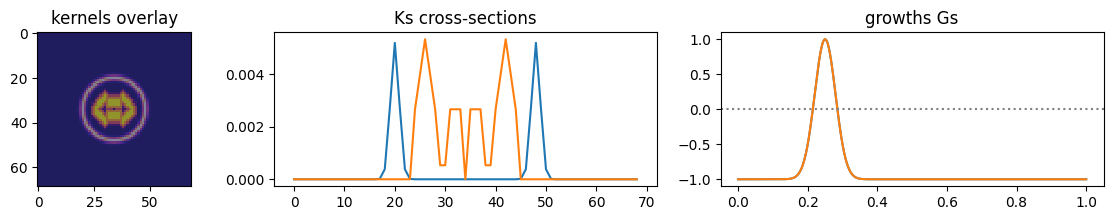

In [27]:
figure_asset_list_v3(Ks, nKs, growth)
fig = figure_world(A)
#animation = FuncAnimation(fig, update, frames=300, interval=20)
IPython.display.HTML(matplotlib.animation.FuncAnimation(fig, update, frames=200, interval=20).to_jshtml())
#animation.save('aly_second_step.mp4', writer='ffmpeg')